In [116]:
### Script by Johannes Cunow
### Edited: 25.01.24

# adapted from https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html

In [97]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('C:/Users/jocu0013/Desktop/Oulanka/Scan_Raw/Oulanka2022_June/Oulanka_2022_T067_L001_01.06.22_210733_001_RLM.tiff',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('C:/Users/jocu0013/Desktop/Oulanka/Scan_Raw/Oulanka2022_June/Oulanka_2022_T067_L002_01.06.22_210932_001_RLM.tiff',cv.IMREAD_GRAYSCALE) 
img3 = cv.imread('C:/Users/jocu0013/Desktop/Oulanka/Scan_Raw/Oulanka2022_June/Oulanka_2022_T067_L003_01.06.22_211149_001_RLM.tiff',cv.IMREAD_GRAYSCALE) 


Text(0.5, 1.0, 'Third')

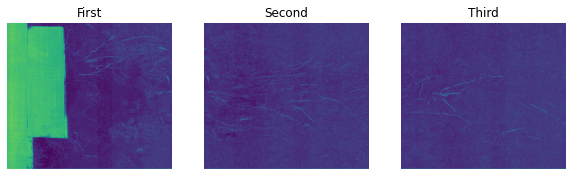

In [146]:
# create figure 
fig = plt.figure(figsize=(10, 7)) 
  
# setting values to rows and column variables 
rows = 1
columns = 3
  

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 

# showing image 
plt.imshow(img1) 
plt.axis('off') 
plt.title("First") 

# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(img2) 
plt.axis('off') 
plt.title("Second") 

# Adds a subplot at the 3rd position 
fig.add_subplot(rows, columns, 3) 
  
# showing image 
plt.imshow(img3) 
plt.axis('off') 
plt.title("Third") 



In [99]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.55*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)


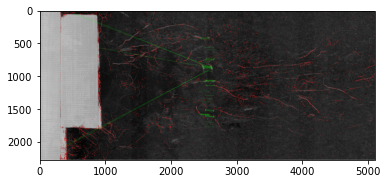

(<matplotlib.image.AxesImage at 0x21f84690730>, None, None)

In [100]:
img12 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img12,),plt.show(),plt.imsave("matcher12.png", img12)

In [111]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img2,None)
kp2, des2 = sift.detectAndCompute(img3,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
#matches = matches[0:1000]
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)


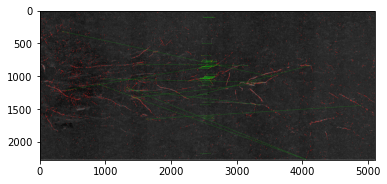

In [115]:
img23 = cv.drawMatchesKnn(img2,kp1,img3,kp2,matches,None,**draw_params)
plt.imshow(img23,),plt.show()
plt.imsave("matcher23.png", img23)